In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
full_data = pd.read_csv('C:\\Users\\Ali Traders\\Downloads\\titanic_dataset.csv')

In [3]:
full_data.shape

(891, 12)

In [5]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
full_data.drop('Ticket',axis = 1, inplace = True)

In [8]:
full_data.shape

(891, 11)

In [13]:
full_data.drop('Cabin' ,axis = 1,inplace = True)

In [14]:
full_data.drop('Name',axis = 1, inplace = True)

In [15]:
full_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


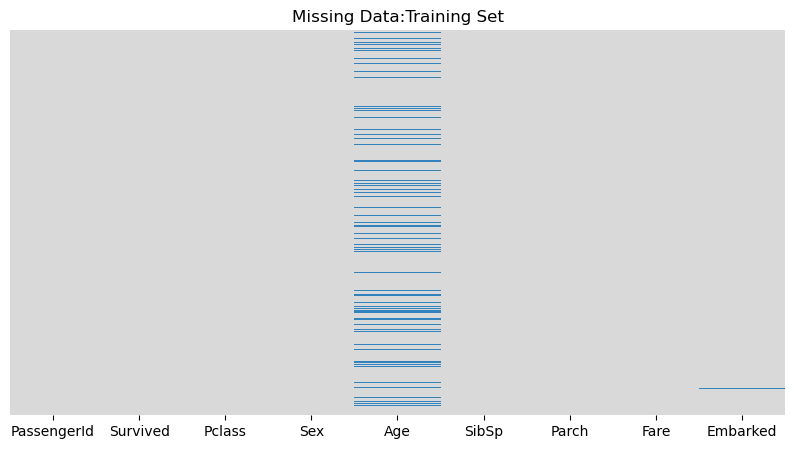

In [18]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title("Missing Data:Training Set")
plt.show()

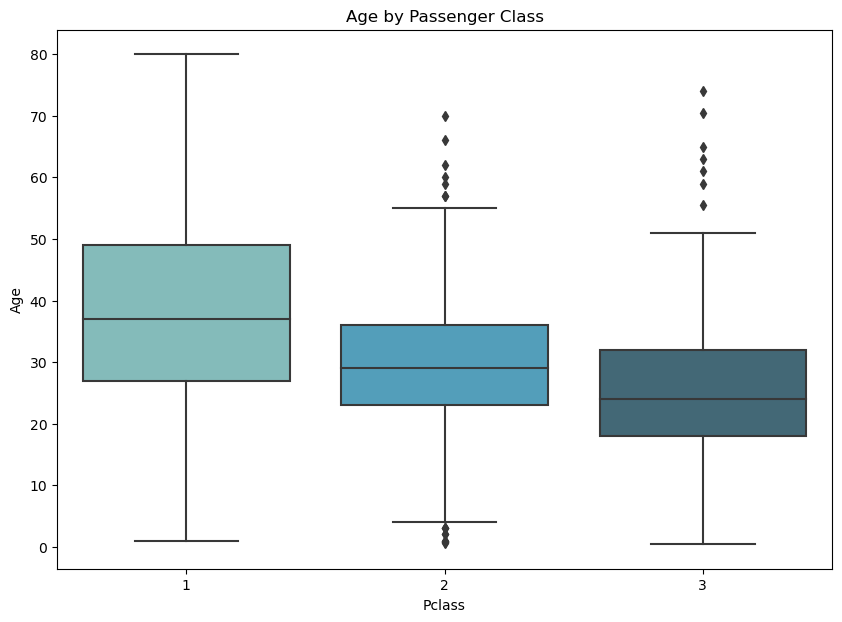

In [20]:
plt.figure(figsize = (10,7))
sns.boxplot(x='Pclass',y = 'Age' , data = full_data , palette= 'GnBu_d')
plt.title('Age by Passenger Class')
plt.show()

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
full_data['Age'] = full_data[['Age','Pclass']].apply(impute_age, axis = 1)

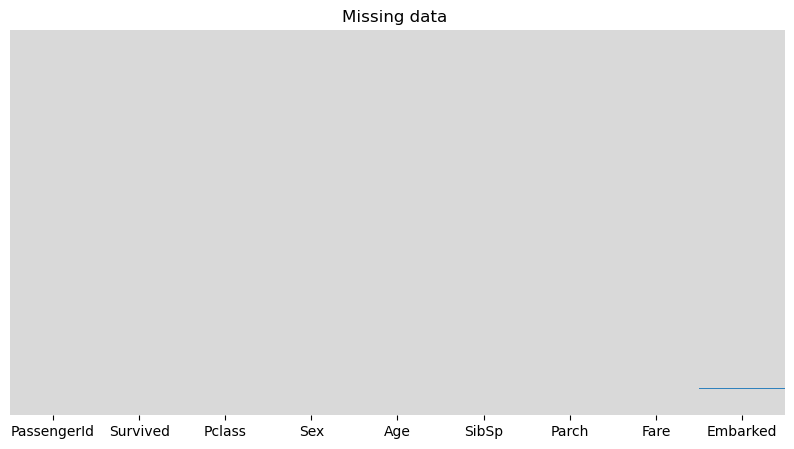

In [24]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r').set_title("Missing data ")
plt.show()

In [25]:
full_data.dropna(inplace = True)

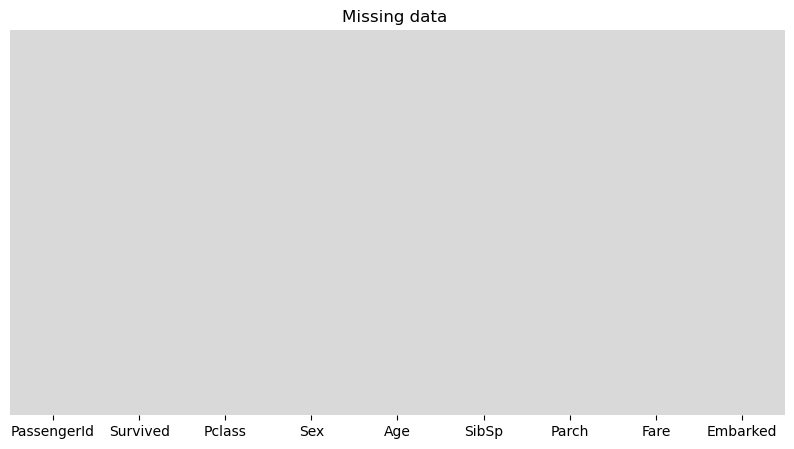

In [26]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r').set_title("Missing data ")
plt.show()

In [27]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [29]:
objcat = ['Sex','Embarked']

for cols in objcat:
    full_data[cols] = full_data[cols].astype('category')

In [30]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 57.5 KB


In [32]:
full_data.drop('PassengerId', axis = 1, inplace = True)

In [36]:
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [37]:
full_data.select_dtypes('int').columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [38]:
Sex = pd.get_dummies(full_data['Sex'],drop_first = True)

In [39]:
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
Embarked = pd.get_dummies(full_data['Embarked'],drop_first = True)

In [46]:
full_data = pd.concat([full_data,Sex,Embarked],axis = 1)
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [47]:
full_data.shape

(889, 12)

In [49]:
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [51]:
x = full_data.drop('Survived' , axis = 1)
y = full_data['Survived']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state = 102)

In [53]:
x_train.shape

(711, 11)

In [54]:
y_test.shape

(178,)

In [56]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
284,1,37.00,0,0,26.0000,1,0,1,1,0,1
803,3,0.42,0,1,8.5167,1,0,0,1,0,0
470,3,24.00,0,0,7.2500,1,0,1,1,0,1
560,3,24.00,0,0,7.7500,1,1,0,1,1,0
322,2,30.00,0,0,12.3500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
627,1,21.00,0,0,77.9583,0,0,1,0,0,1
243,3,22.00,0,0,7.1250,1,0,1,1,0,1
591,1,52.00,1,0,78.2667,0,0,0,0,0,0
756,3,28.00,0,0,7.7958,1,0,1,1,0,1


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_predict = lreg.predict(x_test)
print(y_predict)
y_predict.shape

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0]


(178,)

In [65]:
prob = lreg.predict_proba(x_test)[:,1]
print(prob)

[0.1920024  0.18974491 0.07680425 0.07672696 0.11550689 0.04016898
 0.56122052 0.30453683 0.395935   0.07990498 0.3130012  0.44256284
 0.75913744 0.34269903 0.15256491 0.92749179 0.11105724 0.94558372
 0.11770122 0.09340584 0.07380269 0.16134417 0.69532845 0.17025202
 0.73878857 0.06035573 0.26847436 0.11768754 0.16724029 0.25069817
 0.10495727 0.34208515 0.66597374 0.3344906  0.26105376 0.61433742
 0.04730114 0.14227017 0.80595554 0.0399756  0.4704353  0.16018678
 0.84831613 0.61158664 0.87887017 0.14928196 0.20732976 0.60721251
 0.13663392 0.44306518 0.71648858 0.50609631 0.78089652 0.21280835
 0.10756566 0.81286627 0.72180494 0.90254707 0.44306518 0.04383359
 0.56958158 0.66387201 0.11432897 0.1591564  0.437976   0.1132875
 0.37862771 0.24533347 0.44055471 0.42662859 0.11766206 0.39346627
 0.06320693 0.11771868 0.13254231 0.68109315 0.13181933 0.12283117
 0.08989256 0.33886938 0.14277061 0.86532334 0.08987918 0.46559495
 0.81541864 0.09099987 0.23697674 0.68866394 0.12222956 0.18091

In [69]:
for i in range(len(y_test)):
    print(f"probabilitees : {prob[i]} and y predict = {y_predict[i]}")

probabilitees : 0.1920023959893458 and y predict = 0
probabilitees : 0.1897449093320685 and y predict = 0
probabilitees : 0.07680424692499527 and y predict = 0
probabilitees : 0.07672695652911188 and y predict = 0
probabilitees : 0.11550689372773823 and y predict = 0
probabilitees : 0.04016897672636481 and y predict = 0
probabilitees : 0.5612205184097513 and y predict = 1
probabilitees : 0.30453682547338384 and y predict = 0
probabilitees : 0.39593500145073407 and y predict = 0
probabilitees : 0.07990497761812612 and y predict = 0
probabilitees : 0.3130011983226569 and y predict = 0
probabilitees : 0.442562836306855 and y predict = 0
probabilitees : 0.7591374442101531 and y predict = 1
probabilitees : 0.34269902579076766 and y predict = 0
probabilitees : 0.15256491190854893 and y predict = 0
probabilitees : 0.9274917930127012 and y predict = 1
probabilitees : 0.11105723778188882 and y predict = 0
probabilitees : 0.9455837187613572 and y predict = 1
probabilitees : 0.11770121810978808 a

In [71]:
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_predict) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 78.09 %
